# Homework 18

In [1]:
from all_imports import *
%matplotlib inline

### Problem 1 (0.5 point)

Execute and read relevant parts of the `help(curve_fit)` docstring. Then answer the following questions:
* How do you give guess values for the fitting parameters?
* If you don't give guess values, what values are assumed?
* What "extra data" are returned along with the solution to the set of parameters?

Do not include the lengthly `curve_fit` docstring in your answer below: the TAs don't need to read it. 🙂

Answer:

1. The array parameter "p0" can be use to pass guess values.
2. Otherwise 1 is used for each guess value.
3. The estimated covariance of the resulting fit.

### Problem 2 (4.5 points)
The following "noisy" kinetic data for $r$ versus $T$ were collected. We want to fit this to the following model function that has some basis in chemical physics: $$r_\mathrm{fit}(T) = kT^m e^{-E_a/T}$$ $k$, $m$, and $E_a$ are adjustable parameters that we want to find so that our model best fits the experimental data. For purposes of this problem, treat all quantities as dimensionless, including temperature.

* Make a well-formatted plot ($T$ in horizontal axis and $r$ in vertical axis) with the experimental data as well as a curve for the fitting equation using _guess_ parameters. Manually adjust the guess values while examining the results on the plot to get a reasonable staring fit of the data. It is recommended that you keep your guesses around $m=1$ and $k>0.01$ and $E_a<2000$.
* Use `curve_fit` to compute the best parameters. Provide their values in self-explanatory print statements. Hint: you will probably need to increase modestlyy the maximum number of iterations on `curve_fit` through an optional argument `maxfev=...` 
* Next, give the Pearson $R^2$ value for the fit, just like Excel could for a trendline. 
* Lastly, add the best fit curve to the existing plot (it should now show 3 sets of data). Even though you used only 8 temperature points to make the fit, many additional points should be used in that curve to make it smooth. Furthermore the fitted curve should be extrapolated beyond the experimental range, covering a range of temperatures down to 300 and up to 1200.

In [2]:
# Experimental T and r values:
T_exp = np.array([490., 571., 643., 720., 786., 857., 928., 990.])
r_exp = np.array([18.4, 25.8, 43.9, 60.7, 72.5, 98.8, 116.7, 139.6])

def r_fit(T, k, m, E_a):
    return k * T**m * np.exp(-1*E_a/T)

In [3]:
k_guess = 0.1
m_guess = 1.2
E_a_guess = 1100
T_space = np.linspace(500, 1000, 500)

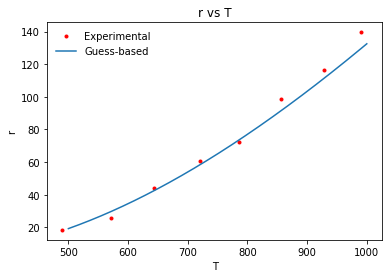

In [4]:
plt.plot(T_exp, r_exp, 'r.')
plt.plot(T_space, r_fit(T_space, k_guess, m_guess, E_a_guess))
plt.title('r vs T')
plt.xlabel('T')
plt.ylabel('r')
plt.legend(['Experimental','Guess-based'], fontsize=10, frameon=False, loc='upper left');

In [5]:
fit_res = curve_fit(r_fit, T_exp, r_exp, p0 = [k_guess, m_guess, E_a_guess])[0]
k_fit = fit_res[0]
m_fit = fit_res[1]
E_a_fit = fit_res[2]
print('The closest values of k, m and E_a as determined by a least squares algorithm are {K:.4f}, {M:.2f}, and {Ea:.0f} respectively.'.format(
    K = k_fit,
    M = m_fit,
    Ea = E_a_fit
))
print('The Pearson R^2 value for the fit is {R2:.5f}'.format(
    R2=np.corrcoef(r_exp, r_fit(T_exp, k_fit, m_fit, E_a_fit))[0][1]
))

The closest values of k, m and E_a as determined by a least squares algorithm are 0.0244, 1.41, and 1076 respectively.
The Pearson R^2 value for the fit is 0.99855


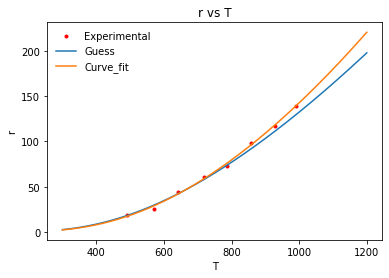

In [6]:
T_space = np.linspace(300, 1200, 500)

plt.plot(T_exp, r_exp, 'r.')
plt.plot(T_space, r_fit(T_space, k_guess, m_guess, E_a_guess))
plt.plot(T_space, r_fit(T_space, k_fit, m_fit, E_a_fit))
plt.title('r vs T')
plt.xlabel('T')
plt.ylabel('r')
plt.legend(['Experimental','Guess', 'Curve_fit'], fontsize=10, frameon=False, loc='upper left');

### Problem 3 (3 points)

Repeat Problem 2, except use a 4th-order polynomial in $T$ for the fitting curve $r_\mathrm{fit}(T)$, where its  coefficients are now the fitting parameters. Do not use `curve_fit` but rather `polyfit`. Give the Pearson's $R^2$ value. Make a plot that has the experimental data and the fitting curve, using the same range of temperatures used in Problem 2. After your code and plot, discuss briefly in a Markdown cell the most significant disadvantage and advantage for an engineer to use the polynomial fit relative to the semi-empirical physics-based fit of Problem 2.


The Pearson R^2 value for the fit is 0.99869


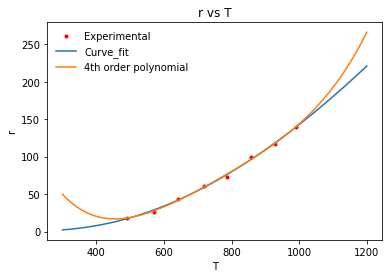

In [8]:
p = np.polyfit(T_exp, r_exp, 4)
R_fit = np.zeros(len(T_space))
R_fit = np.polyval(p, T_space)


print('The Pearson R^2 value for the fit is {R2:.5f}'.format(
    R2=np.corrcoef(r_exp, np.polyval(p, T_exp))[0][1]
))

plt.plot(T_exp, r_exp, 'r.')
plt.plot(T_space, r_fit(T_space, k_fit, m_fit, E_a_fit))
plt.plot(T_space, R_fit)
plt.title('r vs T')
plt.xlabel('T')
plt.ylabel('r')
plt.legend(['Experimental', 'Curve_fit', '4th order polynomial'], fontsize=10, frameon=False, loc='upper left');